**CUFFLESSBP MEASUREMENT PROJECT**

In [ ]:
import mat73
mat_data = mat73.loadmat("\Part_1.mat")  

In [2]:
import numpy as np
print("Top-level keys in the MAT file:")
print(list(mat_data.keys()))
print("="*60)

# Inspect each variable
for key, value in mat_data.items():
    print(f"\n🔑 Variable: {key}")
    print(f"   Type: {type(value)}")
    
    if isinstance(value, np.ndarray):
        print(f"   Shape: {value.shape}, Dtype: {value.dtype}")
    elif isinstance(value, dict):
        print(f"   Nested dictionary with {len(value)} keys: {list(value.keys())[:10]}")
    elif isinstance(value, list):
        print(f"   List with length {len(value)}. Example element type: {type(value[0])}")
    else:
        print(f"   Value: {value}")
    
import matplotlib.pyplot as plt
import numpy as np

# Access the list
part1 = mat_data["Part_1"]

print(f"Total entries: {len(part1)}")

# Show first 5 entries
for i in range(5):
    arr = part1[i]
    print(f"\nEntry {i} -> type: {type(arr)}, shape: {arr.shape}, dtype: {arr.dtype}")
    print(arr[:10])  # print first 10 values of that entry



Top-level keys in the MAT file:
['Part_1']

🔑 Variable: Part_1
   Type: <class 'list'>
   List with length 3000. Example element type: <class 'numpy.ndarray'>
Total entries: 3000

Entry 0 -> type: <class 'numpy.ndarray'>, shape: (3, 61000), dtype: float64
[[ 1.75953079e+00  1.71847507e+00  1.68426197e+00 ...  1.64418377e+00
   1.60019550e+00  1.56598240e+00]
 [ 6.70629552e+01  6.93586281e+01  7.53664529e+01 ...  7.64410232e+01
   8.18138747e+01  9.13873191e+01]
 [-6.06060606e-02 -7.52688172e-02 -7.03812317e-02 ... -1.00195503e-01
  -9.04203324e-02 -4.54545455e-02]]

Entry 1 -> type: <class 'numpy.ndarray'>, shape: (3, 61000), dtype: float64
[[ 2.40957967  2.32942326  2.23851417 ...  1.24046921  1.23069404
   1.21994135]
 [73.75459745 73.1684682  72.53349484 ... 99.15353167 96.22288542
  93.19455095]
 [ 0.18475073  0.17986315  0.16959922 ...  0.29472141  0.31964809
   0.33968719]]

Entry 2 -> type: <class 'numpy.ndarray'>, shape: (3, 50000), dtype: float64
[[  1.21212121   1.20136852   

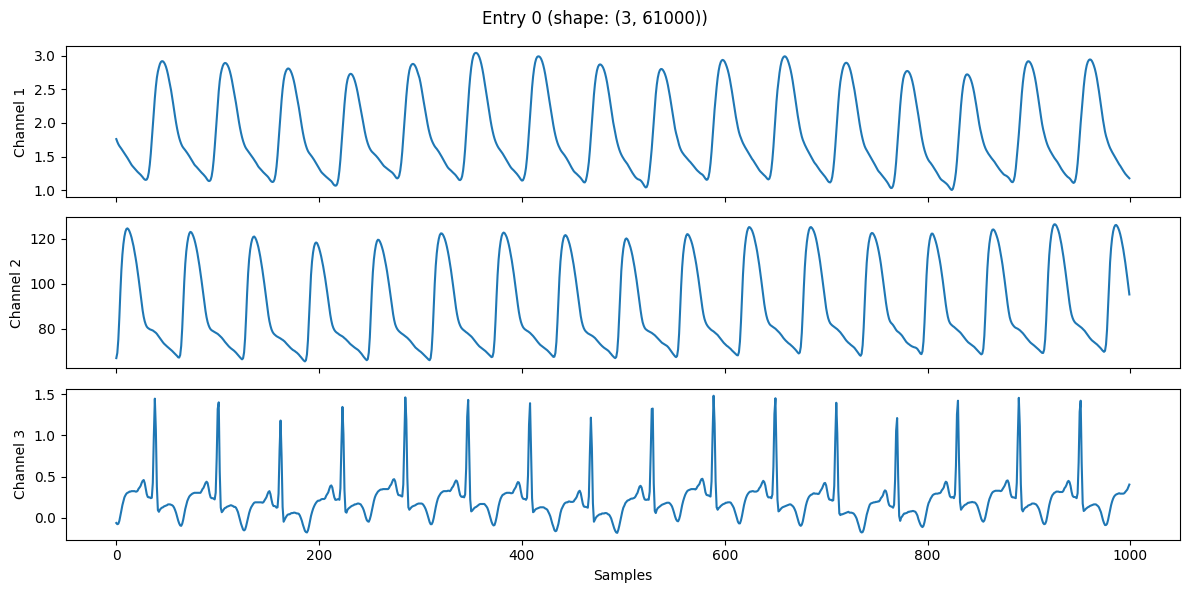

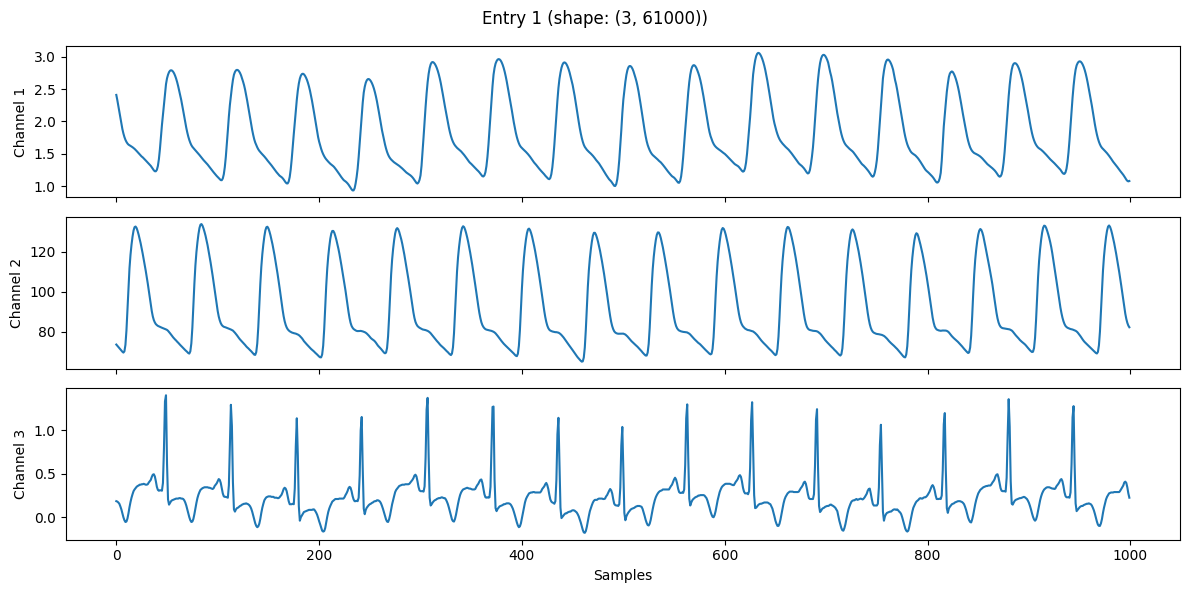

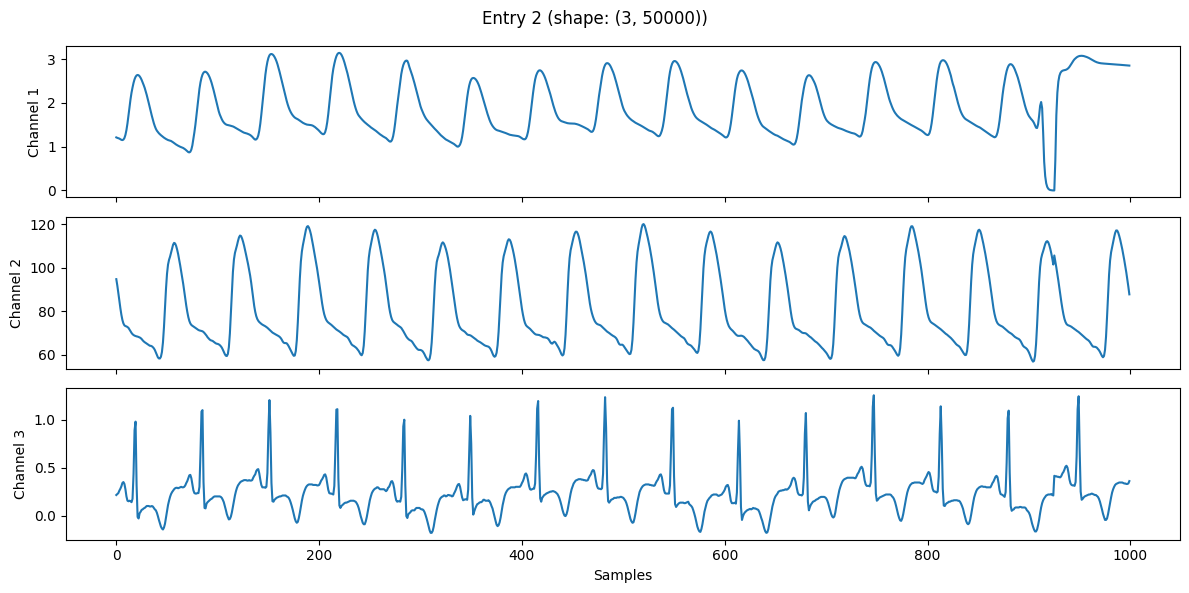

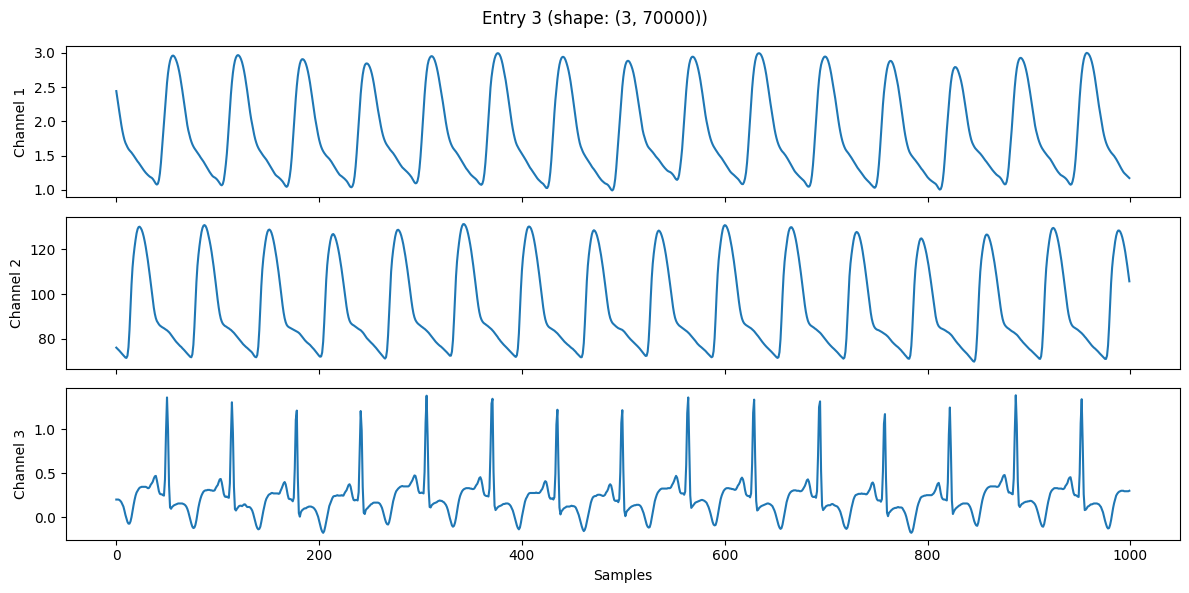

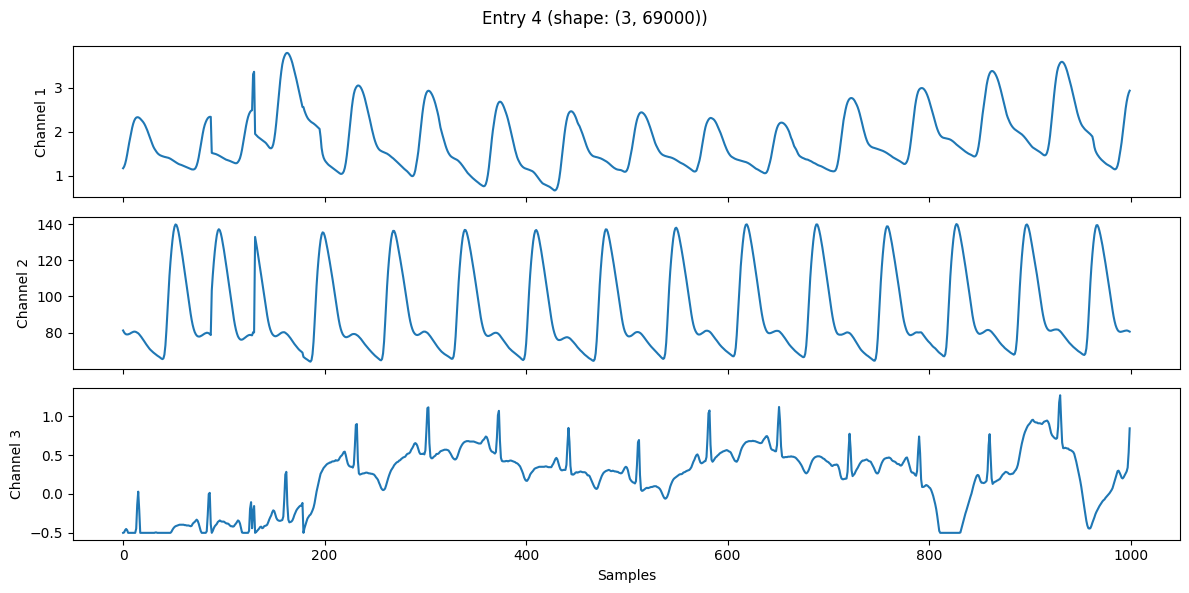

In [3]:
import matplotlib.pyplot as plt


# Each cell contains a 3-row matrix:
# Row 1: PPG signal (125 Hz)
# Row 2: ABP signal (125 Hz) 
# Row 3: ECG signal (125 Hz)


# PTT = PAT - PEP                            PAT - ECG R PEAK TO PPG FIDUCIAL            PEP - SCG R PEAK TO ABP FIDUTIAL


# Pick first 5 entries
for idx in range(5):
    data = mat_data['Part_1'][idx]  # shape (3, 61000)
    fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
    fig.suptitle(f"Entry {idx} (shape: {data.shape})")
    
    for ch in range(3):
        axs[ch].plot(data[ch][:1000])  # plot first 1000 samples to zoom in
        axs[ch].set_ylabel(f"Channel {ch+1}")
    
    plt.xlabel("Samples")
    plt.tight_layout()
    plt.show()


**COMBIINING ALL THE PARTS TO ONE DATA**

In [ ]:
import mat73
import os

# Folder where all your .mat files are stored
data_dir = r"\data_folder"

# List of parts to load
parts = ["Part_1.mat", "Part_2.mat", "Part_3.mat", "Part_4.mat"]

# Master list to hold all patients across all parts
all_data = []

for fname in parts:
    file_path = os.path.join(data_dir, fname)
    print(f"Loading {file_path} ...")
    
    mat_data = mat73.loadmat(file_path)
    
    # Each file has key 'Part_#' → we don’t know key name directly, so take first
    part_key = list(mat_data.keys())[0]
    
    # Append to master list
    all_data.extend(mat_data[part_key])

print(f"Total patients combined: {len(all_data)}")


In [ ]:
import numpy as np

# Store stats for each channel
stats = {0: [], 1: [], 2: []}  # 0=PPG, 1=ABP, 2=ECG

for patient_idx, patient_data in enumerate(all_data):
    for ch in range(3):
        signal = patient_data[ch]
        stats[ch].append(len(signal))

# Convert lists to numpy arrays for easier stats
for ch in range(3):
    lengths = np.array(stats[ch])
    print(f"\nChannel {ch} stats:")
    print(f"  Patients: {len(lengths)}")
    print(f"  Mean length: {np.mean(lengths):.2f}")
    print(f"  Std length: {np.std(lengths):.2f}")
    print(f"  Min length: {np.min(lengths)}")
    print(f"  Max length: {np.max(lengths)}")
    print(f"  Median length: {np.median(lengths)}")



Channel 0 stats:
  Patients: 12000
  Mean length: 27807.50
  Std length: 24568.89
  Min length: 1000
  Max length: 74000
  Median length: 20000.0

Channel 1 stats:
  Patients: 12000
  Mean length: 27807.50
  Std length: 24568.89
  Min length: 1000
  Max length: 74000
  Median length: 20000.0

Channel 2 stats:
  Patients: 12000
  Mean length: 27807.50
  Std length: 24568.89
  Min length: 1000
  Max length: 74000
  Median length: 20000.0


**REMOVING PATIENTS WITH LESS THAN 8 MINS OF DATA**

In [ ]:
import numpy as np

# Threshold: 8 minutes of data at 125 Hz
min_samples = 8 * 60 * 125  # = 60000

valid_data = []
short_data = []

# Separate patients
for patient in all_data:
    signal_len = len(patient[0])  # all 3 channels same length
    if signal_len >= min_samples:
        valid_data.append(patient)
    else:
        short_data.append(patient)

print(f"Total patients: {len(all_data)}")
print(f"Valid patients (>= 8 min): {len(valid_data)}")
print(f"Short patients (< 8 min): {len(short_data)}")

# --- Compute stats for valid patients ---
lengths = [len(p[0]) for p in valid_data]  # length from channel 0 (all equal)

lengths = np.array(lengths)
print("\nValid patients stats:")
print(f"  Patients: {len(lengths)}")
print(f"  Mean length: {np.mean(lengths):.2f}")
print(f"  Std length: {np.std(lengths):.2f}")
print(f"  Min length: {np.min(lengths)}")
print(f"  Max length: {np.max(lengths)}")
print(f"  Median length: {np.median(lengths)}")


Total patients: 12000
Valid patients (>= 8 min): 2064
Short patients (< 8 min): 9936

Valid patients stats:
  Patients: 2064
  Mean length: 67803.78
  Std length: 4363.87
  Min length: 60000
  Max length: 74000
  Median length: 68000.0


**Retaining patients with less than 8 moins of data for testiing purposes (OPTIONAL)**

In [ ]:
import numpy as np

# Threshold: 8 minutes of data at 125 Hz
min_samples = 8 * 60 * 125  # = 60000

valid_data = []
short_data = []

# Separate patients
for patient in all_data:
    signal_len = len(patient[0])  # all 3 channels same length
    if signal_len < min_samples:
        valid_data.append(patient)
    else:
        short_data.append(patient)

print(f"Total patients: {len(all_data)}")
print(f"Valid patients (< 8 min): {len(valid_data)}")
print(f"Short patients (>= 8 min): {len(short_data)}")

# --- Compute stats for valid patients ---
lengths = [len(p[0]) for p in valid_data]  # length from channel 0 (all equal)

lengths = np.array(lengths)
print("\nValid patients stats:")
print(f"  Patients: {len(lengths)}")
print(f"  Mean length: {np.mean(lengths):.2f}")
print(f"  Std length: {np.std(lengths):.2f}")
print(f"  Min length: {np.min(lengths)}")
print(f"  Max length: {np.max(lengths)}")
print(f"  Median length: {np.median(lengths)}")



Total patients: 12000
Valid patients (< 8 min): 9936
Short patients (>= 8 min): 2064

Valid patients stats:
  Patients: 9936
  Mean length: 19499.09
  Std length: 17992.53
  Min length: 1000
  Max length: 59000
  Median length: 13000.0


**REMOVING PATEINT DATA WITH MORE THAN 200mmHg of ABP**

In [ ]:
abp_threshold = 200  # mmHg

filtered_data = []
removed_abp = []
removed_indices = []

for idx, patient in enumerate(valid_data):
    abp = patient[1]  # ABP channel
    
    if np.max(abp) <= abp_threshold:
        filtered_data.append(patient)
    else:
        removed_abp.append(patient)
        removed_indices.append(idx)

print(f"Valid patients before ABP filter: {len(valid_data)}")
print(f"Valid patients after ABP filter: {len(filtered_data)}")
print(f"Removed patients (ABP > {abp_threshold} mmHg): {len(removed_abp)}")


Valid patients before ABP filter: 9936
Valid patients after ABP filter: 9936
Removed patients (ABP > 200 mmHg): 0


**DETRENDING PPG SIGNALS**

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt

# --- High-pass filter design ---
fs = 125            # Sampling rate (Hz)
cutoff = 1       # High-pass cutoff (Hz)
order = 4           # Filter order (typical for PPG preprocessing)

# Normalize frequency (cutoff / Nyquist)
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq

# Design Butterworth high-pass filter
b, a = butter(order, normal_cutoff, btype='high', analog=False)

def highpass_filter(signal):
    """Apply zero-phase high-pass filter to 1D signal."""
    return filtfilt(b, a, signal)

# --- Apply filter to all patients ---
ppg_filtered_data = []

for idx, patient in enumerate(filtered_data):  # filtered_data = after ABP filtering
    ppg = patient[0]      # PPG channel
    abp = patient[1]      # ABP channel
    ecg = patient[2]      # ECG channel
    
    ppg_filt = highpass_filter(ppg)
    
    # Store as new patient record (replace PPG with filtered version)
    ppg_filtered_data.append([ppg_filt, abp, ecg])

print(f"Applied high-pass filtering to {len(ppg_filtered_data)} patients.")


**Saving the preprocessed PPG and ABP as seperate files**

In [ ]:
import numpy as np
import os

# Directory to save individual patient files
save_dir = r"\preprocessed_patients"
os.makedirs(save_dir, exist_ok=True)

for idx, patient in enumerate(ppg_filtered_data):
    ppg_filt = patient[0]  # filtered PPG
    abp = patient[1]       # ABP
    
    filename = os.path.join(save_dir, f"patient_{idx}.npz")
    np.savez_compressed(filename, ppg=ppg_filt, abp=abp)
    
    if (idx + 1) % 50 == 0 or idx == len(ppg_filtered_data)-1:
        print(f"Saved {idx+1}/{len(ppg_filtered_data)} patients → {filename}")

print(f"\n✅ All {len(ppg_filtered_data)} patients saved to {save_dir}")


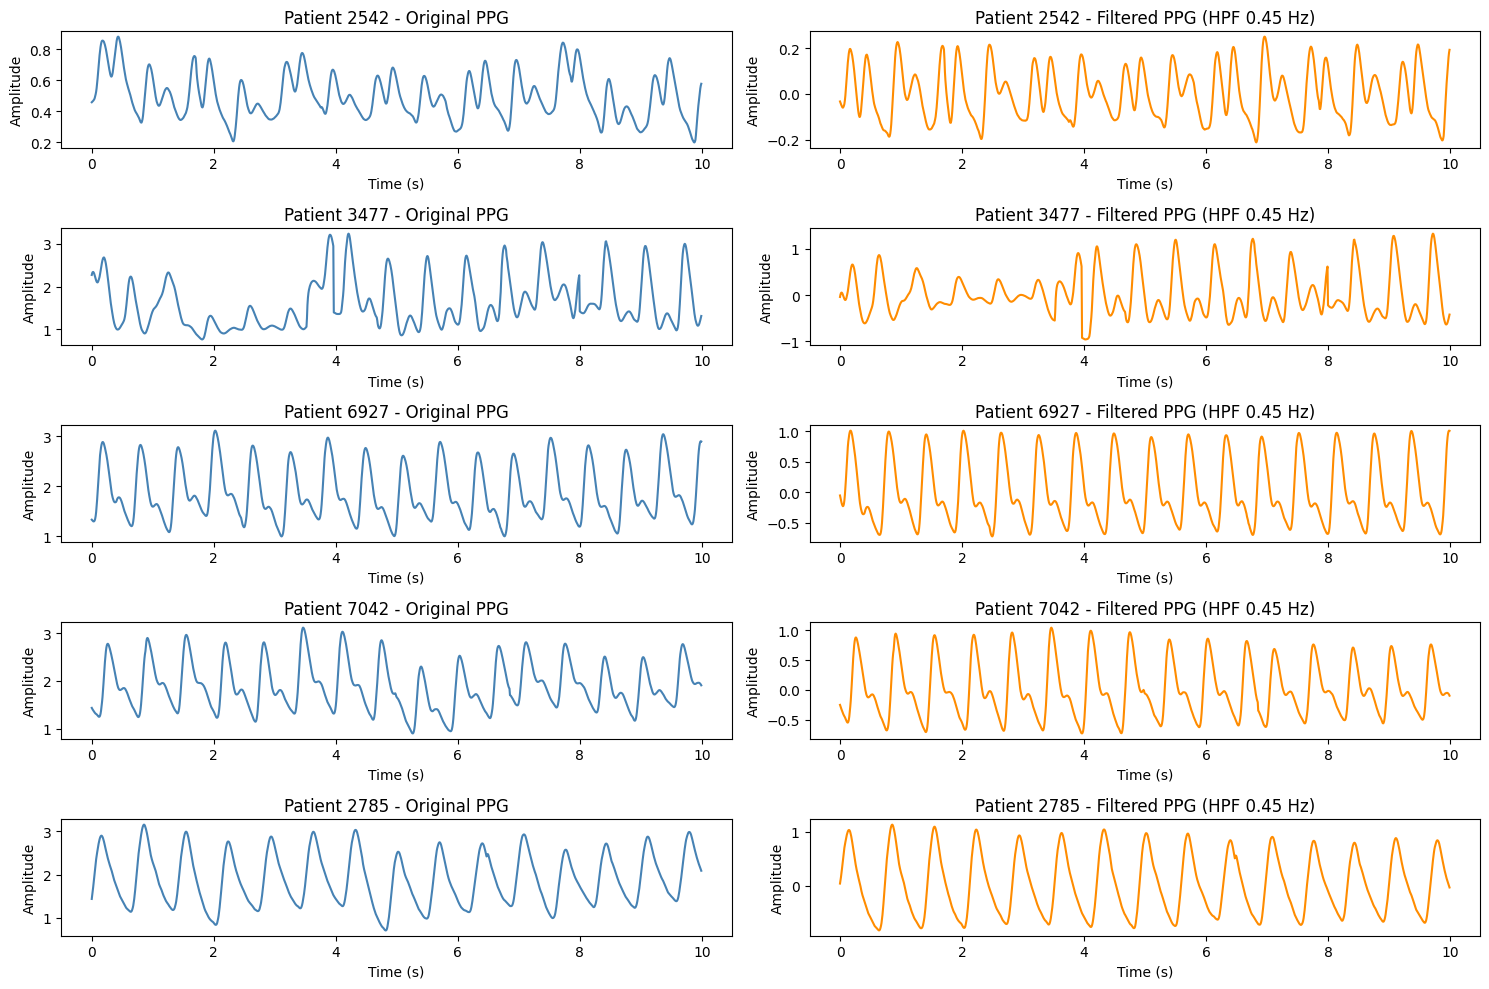

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# --- High-pass filter function ---
def highpass_filter(signal, fs=125, cutoff=1, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered = filtfilt(b, a, signal)
    return filtered

# --- Visualization ---
def visualize_filtered_ppg(valid_data, num_patients=5, fs=125):
    # Pick random patients
    patient_indices = random.sample(range(len(valid_data)), num_patients)

    plt.figure(figsize=(15, 10))

    for i, idx in enumerate(patient_indices):
        patient = valid_data[idx]
        ppg = patient[0]  # channel 0 = PPG

        # Filter
        ppg_filtered = highpass_filter(ppg, fs=fs)

        # For plotting, just show the first 10 seconds (1250 samples)
        n_samples = fs * 10
        t = np.arange(n_samples) / fs

        plt.subplot(num_patients, 2, 2*i+1)
        plt.plot(t, ppg[:n_samples], color="steelblue")
        plt.title(f"Patient {idx} - Original PPG")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

        plt.subplot(num_patients, 2, 2*i+2)
        plt.plot(t, ppg_filtered[:n_samples], color="darkorange")
        plt.title(f"Patient {idx} - Filtered PPG (HPF 1 Hz)")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# --- Call the visualization ---
visualize_filtered_ppg(valid_data, num_patients=5, fs=125)
